<a href="https://colab.research.google.com/github/contatofe/Estudos-e-Desafios/blob/main/Desafio_3_Classifica%C3%A7%C3%A3o_com_Redes_Neurais_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obs.: esse exercício é uma continuação do exercício 1 de classificação.

Resultados obtidos no primeiro desafio:

**Naive Bayes** - Acurácia de teste: 97.37% | Acurácia média: 93.82%

**SVM** - Acurácia de teste: 94.74% | Acurácia média: 91.72%

**Regressão logística** - Acurácia de teste: 95.61% | Acurácia média: 95.05%

**KNN** - Acurácia de teste: 93.86% | Acurácia média: 93.13%

**Árvore de decisões** - Acurácia de teste: 95.61% | Acurácia média: 93.67%

**Random Forest** - Acurácia de teste: 96.49% | Acurácia média: 95.76%

**XGBoost** - Acurácia de teste: 97.37% | Acurácia média: 96.82%

**LightGBM** - Acurácia de teste: 95.61% | Acurácia média: 96.11%

**Catboost** - Acurácia de teste: 96.49% | Acurácia média: 96.65%

#Importações

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Pré Processamento

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Arquivos - Dados/data_cancer2.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 32','id'])

In [ ]:
previsores = df.drop(columns=['diagnosis'])
alvo = df['diagnosis']

In [ ]:
#transformando dados alvo em números.

alvo.replace({'M':0, 'B': 1}, inplace=True)

#Separando bases de treino e teste

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.2, random_state = 42)

#Criando Modelos

## Redes neurais

In [ ]:
#previsões
rede = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', max_iter =800,
                              tol=0.0001, random_state = 42, verbose = False)
rede.fit(x_treino, y_treino)
previsoes_rede = rede.predict(x_teste)

Acurácia: 94.74%


               precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



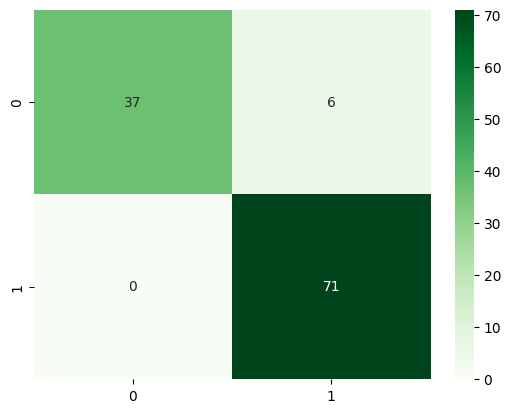

In [ ]:
#métricas - teste
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_rede) * 100.0))
print("\n\n",classification_report(y_teste, previsoes_rede))
sns.heatmap(confusion_matrix(y_teste, previsoes_rede),annot = True, cmap="Greens", fmt="d");

Acurácia: 94.29%


               precision    recall  f1-score   support

           0       0.92      0.92      0.92       169
           1       0.95      0.95      0.95       286

    accuracy                           0.94       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.94      0.94       455



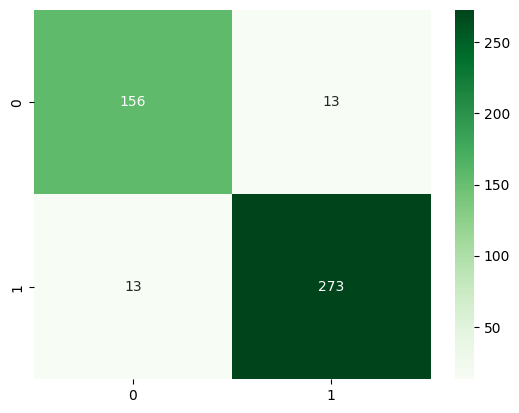

In [ ]:
#métricas - treino
previsoes_treino = rede.predict(x_treino)
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))
print("\n\n", classification_report(y_treino, previsoes_treino))
sns.heatmap(confusion_matrix(y_treino, previsoes_treino),annot = True, cmap="Greens", fmt="d");

In [ ]:
#validação cruzada
kfold = KFold(n_splits = 30, shuffle=True, random_state = 42)
modelo = rede
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 94.55%


##Resultados

**Naive Bayes** - Acurácia de teste: 97.37% | Acurácia média: 93.82%

**SVM** - Acurácia de teste: 94.74% | Acurácia média: 91.72%

**Regressão logística** - Acurácia de teste: 95.61% | Acurácia média: 95.05%

**KNN** - Acurácia de teste: 93.86% | Acurácia média: 93.13%

**Árvore de decisões** - Acurácia de teste: 95.61% | Acurácia média: 93.67%

**Random Forest** - Acurácia de teste: 96.49% | Acurácia média: 95.76%

**XGBoost** - Acurácia de teste: 97.37% | Acurácia média: 96.82%

**LightGBM** - Acurácia de teste: 95.61% | Acurácia média: 96.11%

**Catboost** - Acurácia de teste: 96.49% | Acurácia média: 96.65%

**Redes Neurais** - Acurácia de teste: 94.29% | Acurácia média: 94.55%

As redes neurais performaram um pouco abaixo dos outros modelos já treinados.